In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()
data.shape

(272, 2)

### Initialize your cluster centers

In [3]:
import random

def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    centers = np.empty((k, data.shape[1]))
    for i in range(k):
        # TODO: assign probabilities based on distance --> probability increases with distance
        centers[i] = random.choice(data)
    return centers

print(data.shape)
print(initialize_clusters(data, 2))

(272, 2)
[[ 1.833 59.   ]
 [ 3.917 71.   ]]


### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

(272, 3)


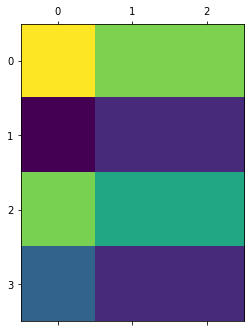

showing 4/272 rows for 3 clusters...


In [4]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    distances = np.empty((data.shape[0], mu.shape[0]))
    for i, point in enumerate(data):
        for j, k in enumerate(mu):
            distances[(i,j)] = np.linalg.norm(point-k)
    return distances

nb_clusters=3
show_n_rows=4
distance_matrix=build_distance_matrix(data, initialize_clusters(data, nb_clusters))
print(distance_matrix.shape)
plt.matshow(distance_matrix[:show_n_rows])
plt.show()
print(f'showing {show_n_rows}/{data.shape[0]} rows for {nb_clusters} clusters...')

#### Update k-means parameters

In [25]:
def assign_clusters(data, mu):
    distances = build_distance_matrix(data, mu)
    assignments = np.argmin(distances, axis=1)
    return assignments, distances

def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    # calculate means of old clusters
    old_assignments, old_distances = assign_clusters(data, mu_old)
    losses = np.min(old_distances, axis=1)
    mu = np.empty(mu_old.shape)
    for k in range(mu_old.shape[0]):
        mu[k] = np.mean(data[old_assignments == k], axis=0)
    return losses, old_assignments, mu

nb_clusters = 3
nb_to_show = 4
losses, assignments, mu = update_kmeans_parameters(data, initialize_clusters(data, nb_clusters))
print('losses', losses[:nb_to_show])
print('assignments', assignments[:nb_to_show])
print('mu', mu)

losses [ 3.03863275 20.05866618  0.         12.04584991]
assignments [2 0 0 0]
mu [[ 2.48201587 58.27777778]
 [ 4.37731522 84.48913043]
 [ 4.31907407 77.18518519]]


#### Play with k-means

The current iteration of k-means is: 0,                the average loss is 14.265247499653919.
The current iteration of k-means is: 1,                the average loss is 6.243364134364627.
The current iteration of k-means is: 2,                the average loss is 4.825244167521961.
The current iteration of k-means is: 3,                the average loss is 4.686722544208671.
The current iteration of k-means is: 4,                the average loss is 4.68244411160236.
The current iteration of k-means is: 5,                the average loss is 4.68244411160236.


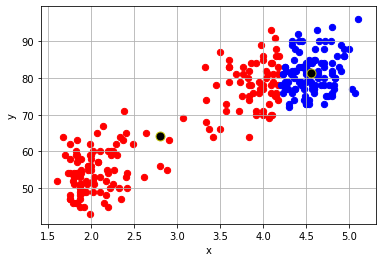

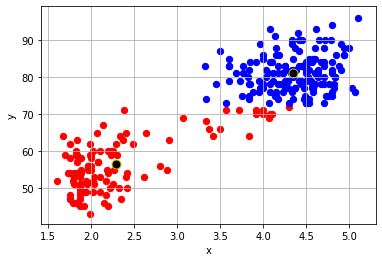

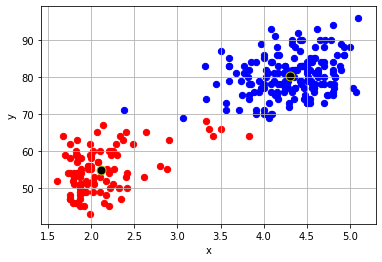

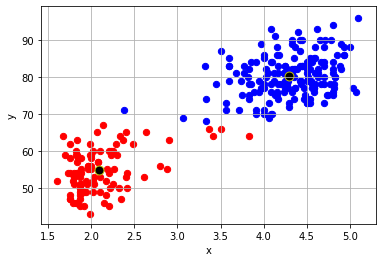

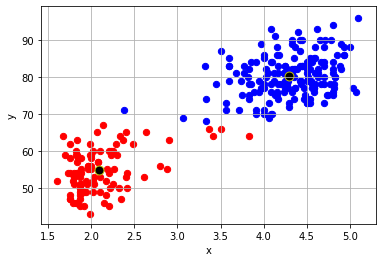

In [26]:
from helper import build_dir
from plots import *

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        #plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        fig, ax = plt.subplots()
        plot_cluster(data, assignments, ['red', 'blue', 'green'], ax)
        ax.scatter(mu[:, 0], mu[:, 1], facecolors='black', edgecolors='y', s=80)
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [31]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [32]:
def preprocess_image(original_image):
    """preprocess the image."""
    processed_image = original_image.reshape(
        (original_image.shape[0] * original_image.shape[1], 3))
    processed_image = processed_image.astype(float)
    print(
        "Current image: the shape of image={s}, the data type={dt}.".format(
            s=processed_image.shape, dt=processed_image.dtype))
    
    return processed_image

processed_image = preprocess_image(original_image)

Current image: the shape of image=(230400, 3), the data type=float64.


The current iteration of kmeans is: 0, the average loss is 63.13949363639399.
The current iteration of kmeans is: 10, the average loss is 36.854887113022315.
The current iteration of kmeans is: 20, the average loss is 36.7752493397412.
The current iteration of kmeans is: 30, the average loss is 36.782715320981595.


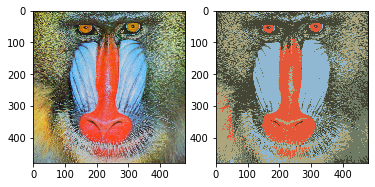

<Figure size 432x288 with 0 Axes>

In [33]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    mu_old = initialize_clusters(processed_image, k)
    
    # init some empty lists to store the result.
    loss_list = []
    
    # start the kmeans
    for iter in range(max_iter):
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)

        if iter % 10 == 0:
            print(
                "The current iteration of kmeans is: {i}, the average loss is {l}.".format(
                    i=iter, l=average_loss))
        
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break

        # update mu
        mu_old = mu
        
    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)